# Classification using Decision Trees

Decision trees are a supervised learning method used typically for classification that can be thought of like a flow chart. (They can also be used for regression, but in this lesson I will just discuss classification.)  The training data is analyzed and the algorithm determines how a data point should be classified based upon the values of a particular feature (or features) at each node of the tree.  

![title](./images/Tree_Image.jpeg)

Image from https://www.pexels.com/photo/two-brown-trees-1632790/

### A Decision Tree consists of :
* Nodes : Represent a test for the value of a certain attribute.
* Edges/ Branches : Correspond to the outcome of a test and connect a node to the next node or a leaf.
* Leaves : Represent the final decision about which class the data point is assigned to.

The visual below shows how the decision tree algorithm works. In this image, we are trying to determine if a loan application is approved or denied.  At the first node, gross income is analyzed.  If it is less than 100K, the loan is denied with no other criteria being considered.  This final decision is an example of a leaf.  If the gross income is greater than or equal to 100K, then the model looks at how many years the person has been at their job.  If they have been at their job greater than or equal to 5 years, the loan is approved.  If less than 5 years, the loan is denied.

![title](./images/DT_02.JPG)

In [1]:
# Imports
import matplotlib.pyplot as plt  
import pandas as pd  
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Let's see a Decision Tree in action using the famous Iris dataset again
(https://archive.ics.uci.edu/ml/datasets/iris)

![title](./images/Irises.jpg)

### Import the Iris dataset

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()

# Print the class names 
# These are the names of the Iris species.  We are trying to classify 
# new, previously unclassified irises as one of these species.
print("***Class Names***")
for item in iris.target_names:
    print(item)

# Print the feature names
# These are the values we will use to perform our classifications
print("\n***Feature Names***")
for item in iris.feature_names:
    print(item)
    
print("\n")

# Define features and target from the dataframe that was created by importing the dataset
# X will be all 4 features
X = iris.data[:, :4]
# y is the type of flower
y = iris.target

***Class Names***
setosa
versicolor
virginica

***Feature Names***
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)




### Create our Decision Tree to classify new, previously unclassified flowers based upon their values for the 4 features

In [3]:
# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Instantiate the DecisionTreeClassifier using default values.  There are many hyperparameters that can be set
# such as: 
# max_depth - The maximum depth of the tree
# min_samples_split - The minimum number of samples required to split a node.
#  min_samples_leaf - The minimum number of samples required to be at a leaf node.
dtc = DecisionTreeClassifier()

# Train the model
dtc.fit(X_train, y_train)

# Make predictions based on the test set and get the accuracy
# Show the accuracy of the predictions
print("***Test set accuracy: {:.2f}% ***".format(dtc.score(X_test, y_test)*100))



***Test set accuracy: 96.67% ***


### Draw the actual decision tree
Description of tree:
* At the first node, it asks "Is petal width (cm) <= 0.8?"  If true, then follow left branch to the leaf and classify as "setosa".  If false, then follow the right branch to the node.

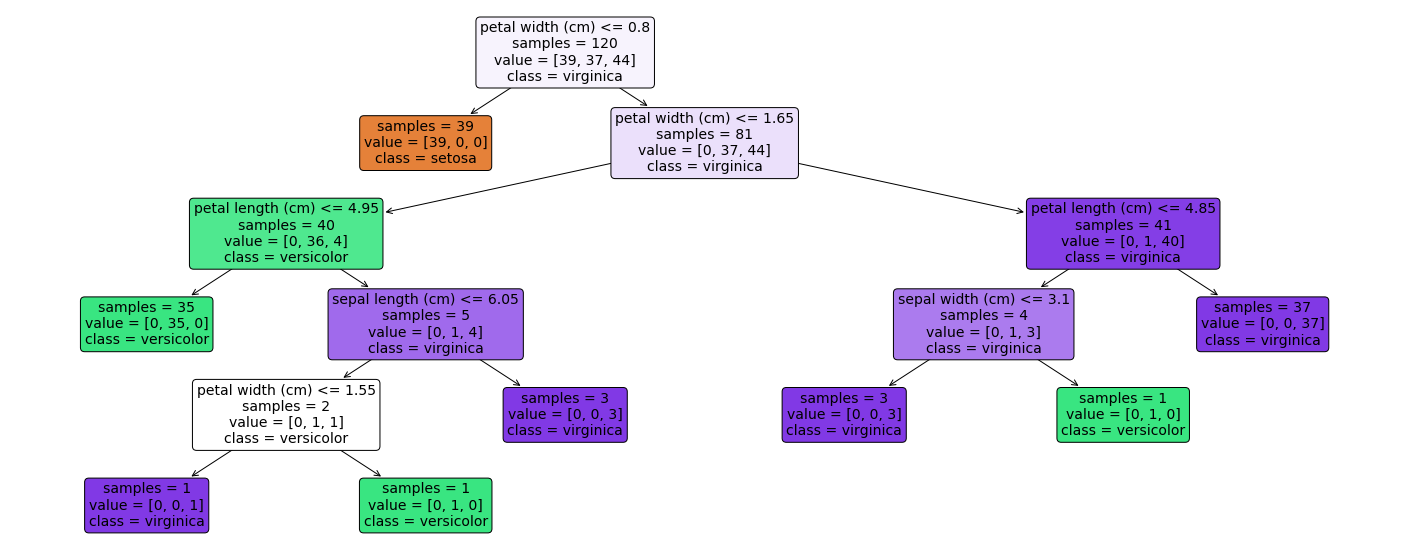

In [4]:
# Create the decision tree visual
plt.figure(figsize=(25,10))
a = plot_tree(dtc, 
              feature_names=iris.feature_names, 
              class_names=iris.target_names, 
              impurity=False,
              filled=True, 
              rounded=True, 
              fontsize=14)


Credits
* https://www.datasciencecentral.com/profiles/blogs/classification-and-regression-trees
* https://towardsdatascience.com/decision-tree-classification-de64fc4d5aac
* https://towardsdatascience.com/how-to-visualize-a-decision-tree-in-5-steps-19781b28ffe2


Last Updated 9/16/20